In [4]:
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# Load the dataset
df = pd.read_csv("adspend.csv")

# Basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())


Dataset shape: (2115, 7)

Columns: ['date', 'shown', 'clicked', 'converted', 'avg_cost_per_click', 'total_revenue', 'ad']

Missing values per column:
 date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64


In [6]:
# Define features (X) and target (y)

X = df.drop("total_revenue", axis=1)
y = df["total_revenue"]

# One-hot encode categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Display shape
print("Feature matrix shape:", X.shape)


Feature matrix shape: (2115, 95)


In [7]:
# Split into training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1692, 95)
Testing set: (423, 95)


In [8]:
# Initialize the model 

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [11]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Derived accuracy from R²
accuracy = r2 * 100

print("--- XGBoost Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.2f}%")


--- XGBoost Model Evaluation Metrics ---
Mean Absolute Error (MAE): 565.186
Mean Squared Error (MSE): 2262546.183
Root Mean Squared Error (RMSE): 1504.176
R² Score: 0.780
Accuracy: 78.03%


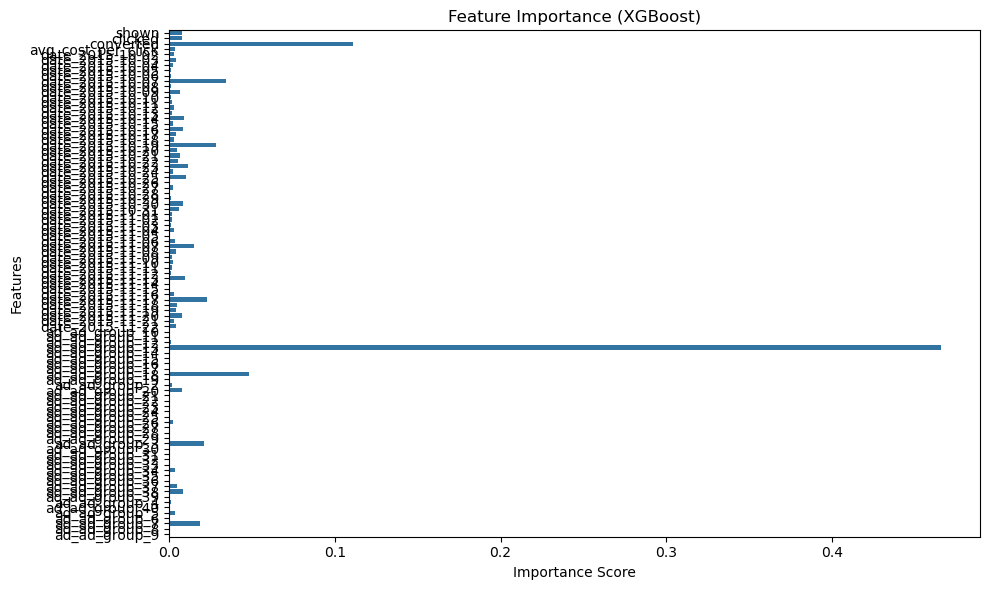

In [10]:
# Plot feature importance

plt.figure(figsize=(10,6))
sns.barplot(
    x=xgb_model.feature_importances_,
    y=X.columns
)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()